<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Telco-Customer-Churn/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

### Sobre as Features:



* CustomerID: Uma identificação única que identifica cada cliente.

* Gender: O gênero do cliente: Masculino, Feminino.

* Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não.

* Partner: Indica se o cliente tem um parceiro: Sim, Não.

* Dependents: Indica se o cliente vive com dependentes: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

* Tenure Months: Indica o total de meses que o cliente está com a empresa até o final do trimestre especificado acima.

* Phone Service: Indica se o cliente assina o serviço de telefone residencial com a empresa: Sim, Não.

* Multiple Lines: Indica se o cliente assina várias linhas telefônicas com a empresa: Sim, Não.

* Internet Service: Indica se o cliente assina o serviço de Internet com a empresa: Não, DSL, Fibra Óptica, Cabo.

* Online Security: Indica se o cliente assina um serviço adicional de segurança online fornecido pela empresa: Sim, Não.

* Online Backup: Indica se o cliente assina um serviço adicional de backup online fornecido pela empresa: Sim, Não.

* Device Protection: Indica se o cliente assina um plano adicional de proteção de dispositivos para seus equipamentos de Internet fornecidos pela empresa: Sim, Não.

* Tech Support: Indica se o cliente assina um plano adicional de suporte técnico da empresa com tempos de espera reduzidos: Sim, Não.

* Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programas de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

* Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

* Contract: Indica o tipo de contrato atual do cliente: Mensal, Um Ano, Dois Anos.

* Paperless Billing: Indica se o cliente optou por faturamento sem papel: Sim, Não.

* Payment Method: Indica como o cliente paga sua conta: Débito em Conta, Cartão de Crédito, Cheque Enviado.

* Monthly Charge: Indica o valor total mensal atual cobrado ao cliente por todos os seus serviços com a empresa.

* Total Charges: Indica o total de cobranças do cliente, calculado até o final do trimestre especificado acima.

* Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu com a empresa. Diretamente relacionado ao Churn Value.


## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset?select=Telco_customer_churn.xlsx).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
                  accuracy_score,
                  confusion_matrix,
                  ConfusionMatrixDisplay,
                  classification_report,
                  roc_auc_score,
                  roc_curve)
from sklearn.preprocessing import (
                  LabelEncoder,
                  OneHotEncoder,
                  StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (
                  GridSearchCV,
                  cross_val_score,
                  StratifiedKFold,
                  RepeatedStratifiedKFold)

from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use("ggplot")
pd.set_option('display.max_columns',None)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/gabriel-cm-saldanha/Telco-Customer-Churn/main/Telco_customer_churn.csv"
df = pd.read_csv(DATA_PATH)

# Análise Exploratória


## Análise Inicial
Aqui iremos realizar uma análise inicial entendendo os tipos de dados que possuimos, a qualidade dos dados (se possui dados ausentes ou não), a distribuição dos dados através do método `describe` e em seguida vamos aprofundando mais a exploração dos dados.

Ao analisar as 5 primeiras linhas, observamos a presença de diversas variáveis categóricas, o que indica que posteriomente teremos que efetuar um Encoder para essas colunas, transformando-as em variáveis numéricas para podermos trabalhar com nosso modelo de previsão.
* Temos a coluna Churn (variável alvo), onde:
  * No;
  * Yes

In [ ]:
# ver as 5 primeiras entradas
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
print("o dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

o dataset possui 7043 linhas e 33 colunas


Verificamos que a única coluna que possui dados nulos é a `Churn Reason`, haja visto que os dados somente serão presentes nos clientes que deram **Churn**. Logo, é esperado que encontrassemos valores ausentes nessa coluna.


Alguns pontos de atenção:
* A coluna `Total Charges` deveria ser do tipo `float`, porém está como uma `string`
  * Mais a frente iremos verificar como os valores estão distribuidos dentro dessa coluna;
  * Se conseguiremos fazer uma conversão direta ou existe a necessidade de trabalhar esses dados;
* Um grande número de variáveis categóricas
  * Teremos que realizar uma codificação para valores numéricos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Analisar valores unicos de cada coluna pode nos fornecer insight através de sua dimensionalidade.
A coluna `CustomerID` não nos fornece nenhuma informação importante para o nosso modelo.

Analisando a coluna `Country` e `State` também podemos remover.

Variaveis como `Latidue`, `Longitude` e `Lat Long` podem ser relevantes para o modelo, pois podem haver regiões que tendem a ter um churn maior que outras regiões.

Sobre a variavel `Zip Code`, optamos por remove-la devido a sua dimensionalidade.

A variável `City` apresenta 1129 entradas, logo verificamos que existem erros nessa coluna, pois o Estado da Califórnia contem 482 localidades, enquanto nossa base nos fornece 1129 valores únicos, além da dimensionalidade.

In [ ]:
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64



In [ ]:
removed_columns = ['CustomerID','Count','Country','State', 'Churn Reason','Lat Long', 'City', 'Latitude', 'Longitude','Zip Code','Churn Label']
df.drop(removed_columns, axis=1, inplace=True)

Agora vamos verificar a coluna `Total Charges`.

Ao tentar utilizar *pd.to_numeric()* nos é informado um erro avisando que a coluna apresenta valores vazios, provavelmente preenchidos com espaço. Então, vamos utilizar o parâmetro *errors = coerce* no pandas para tratar e corrigir esses erros. Em seguida, vamos preencher os valores ausentes com a mediana.

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

A função describe nos fornece um relatorio estatístico de todas as variveis numéricas do conjunto de dados.
Aqui já conseguimos reunir algumas informações relevantes, como em `Tenure Months` onde 50% dos clientes ficam até 29 meses na empresa, 75% até 55 meses, com a mediana do valor mensal pago em U$ 70.35.

Mais a frente iremos aprofundar mais a análise para entendermos como está a distribuição para os casos de *Churn* e *Não Churn*.

In [ ]:
df.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


## Analisando a distribuição da base de dados

Vamos verificar se estamos trabalhando com um conjunto de dados desbalanceados ou não, pois em conjuntos desbalanceados requerem um outro tipo de abordagem, afim de minimizar o impacto no modelo de machine learning.

Aqui percebemos que não existe um desbalanceamento, uma vez que temos 27% da base com clientes de Churn e 73% de clientes não Churn.

Total de Churn: 0.27
Total de Não Churn: 0.73


Text(0.5, 1.0, 'Distribuição da Variável Alvo')

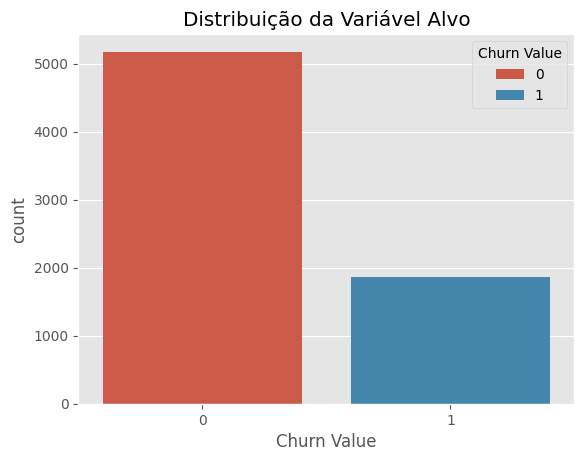

In [ ]:
print("Total de Churn: {}".format(round(df['Churn Value'].value_counts()[1] / df.shape[0],2)))
print("Total de Não Churn: {}".format(round(df['Churn Value'].value_counts()[0] / df.shape[0],2)))
sns.countplot(x='Churn Value', data=df,hue='Churn Value')
plt.title('Distribuição da Variável Alvo')

## Segmentação dos Dados

Vamos entender um pouco melhor como está dividida nossa base de dados, segmentando a distribuição por gênero para vermos se existe algum gênero quero é mais propício ao churn do que outro, e também o método de pagamento, uma vez que inconveniências com isso pode gerar insatisfação no cliente e consequentemente desistência do produto.

Verificamos que quanto ao gênero, não temos alguma diferença aparente, apresentando a mesma proporção entre ambos os gêneros para as duas classes.

Ao analisar o meio de pagamento já temos uma diferença aparente, onde pessoas que utilizam *Eletronic Check* tendem mais ao Churn que quem utiliza outros métodos de pagamento. Já temos uma característica que pode ser relevante no nosso modelo.

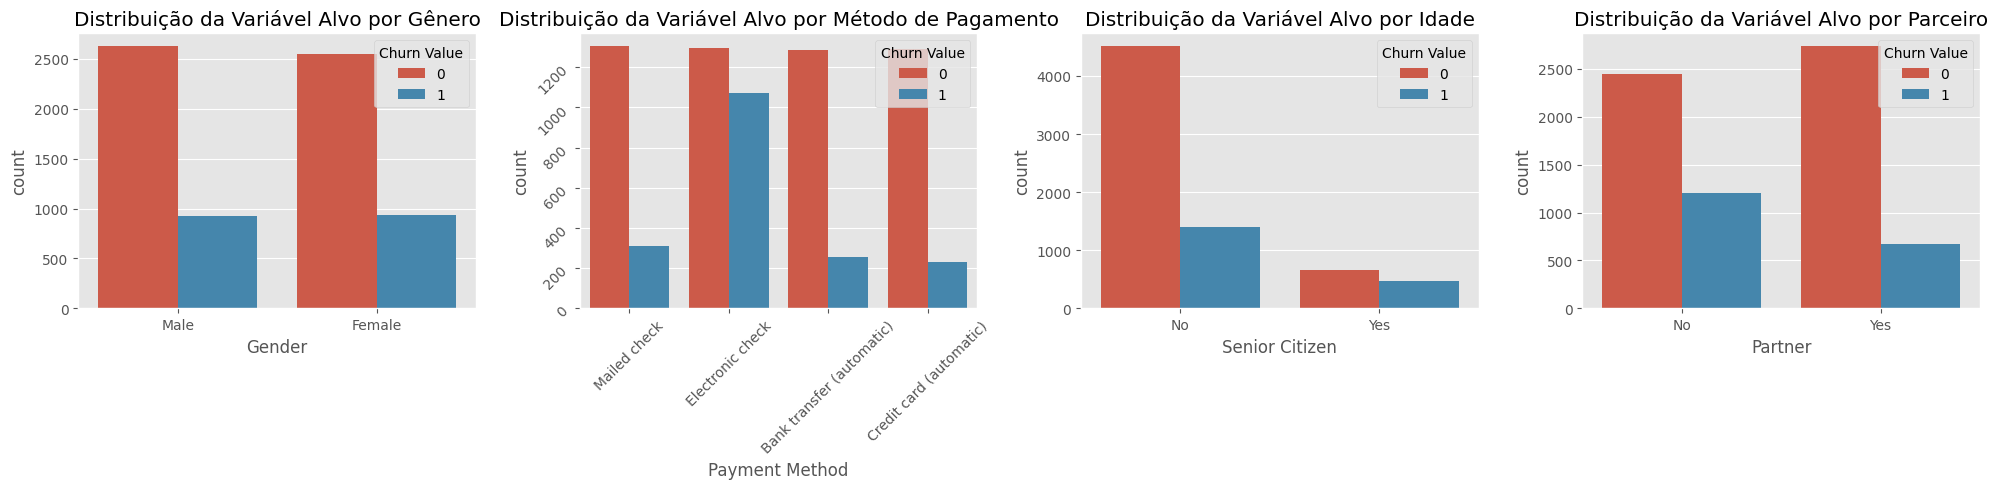

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
sns.countplot(x='Gender', data=df, hue='Churn Value', ax=ax[0])
ax[0].set_title('Distribuição da Variável Alvo por Gênero');

sns.countplot(x='Payment Method', data=df, hue='Churn Value', ax=ax[1])
ax[1].set_title('Distribuição da Variável Alvo por Método de Pagamento');
ax[1].tick_params(labelrotation=45);

sns.countplot(x='Senior Citizen', data=df, hue='Churn Value', ax=ax[2])
ax[2].set_title('Distribuição da Variável Alvo por Idade');

sns.countplot(x='Partner', data=df, hue='Churn Value', ax=ax[3])
ax[3].set_title('Distribuição da Variável Alvo por Parceiro');

plt.tight_layout();

Será que temos alguma relação entre os valores pagos e os casos de churn?

Aqui plotamos 2 gráficos, um da média e outra da mediana dos valores pagos pelos clientes, segregando em Churn e Clientes Ativos. Anteriormente, tinhamos visto quando utilizamos o `describe` que 50% dos clientes estão até 29 meses na empresa, com a média em 32 meses, e quanto ao valor pago mensalmente, 50% dos clientes pagam até 70.35, com a média em 64.76.

Será que os clientes que deram Churn foram os clientes que pagavam mais?
Bom, quando separamos entre Churn e cliente ativos, observamos em vermelho os clientes que deram churn possuem valor de `Monthly Charges` maior que os clientes ativos em azul.

Esses clientes tiveram um desconto na fatura para não sairem da empresa, por isso os valores são menores? Existe essa possibilidade, uma vez que quando um cliente liga desistindo de continuar com a empresa, normalmente são oferecidos planos mais atrativos.

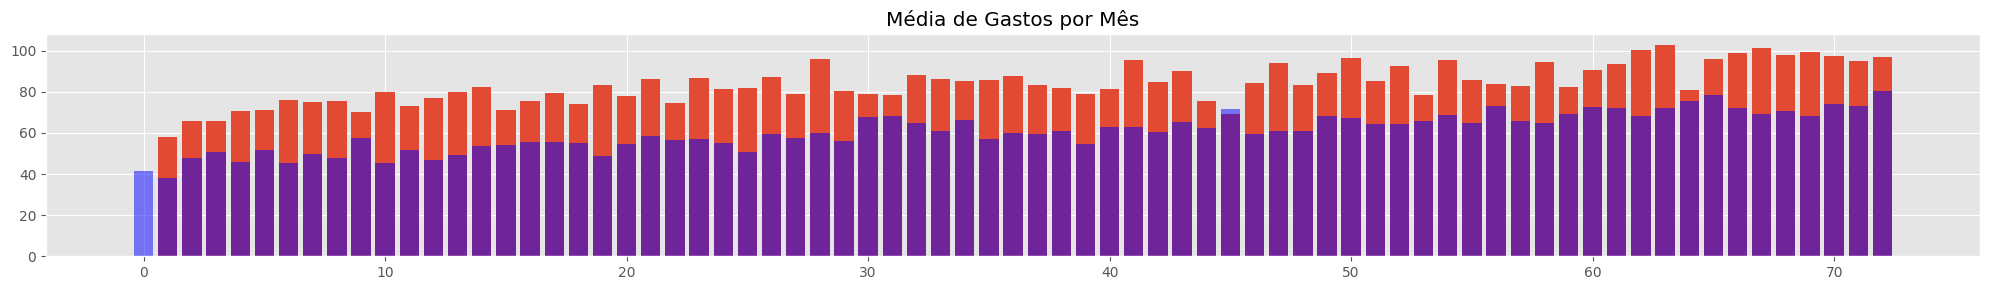

In [ ]:
mean_charges_no_churn = df[df['Churn Value'] == 0].groupby('Tenure Months')['Monthly Charges'].mean()
mean_charges_churned = df[df['Churn Value'] == 1].groupby('Tenure Months')['Monthly Charges'].mean()

median_charges_no_churn = df[df['Churn Value'] == 0].groupby('Tenure Months')['Monthly Charges'].median()
median_charges_churned = df[df['Churn Value'] == 1].groupby('Tenure Months')['Monthly Charges'].median()

fig, ax = plt.subplots(figsize=(20,3))

ax.bar(mean_charges_churned.index, mean_charges_churned.values)
ax.bar(mean_charges_no_churn.index, mean_charges_no_churn.values, color='b', alpha=.5)
ax.set_title('Média de Gastos por Mês')

plt.tight_layout();

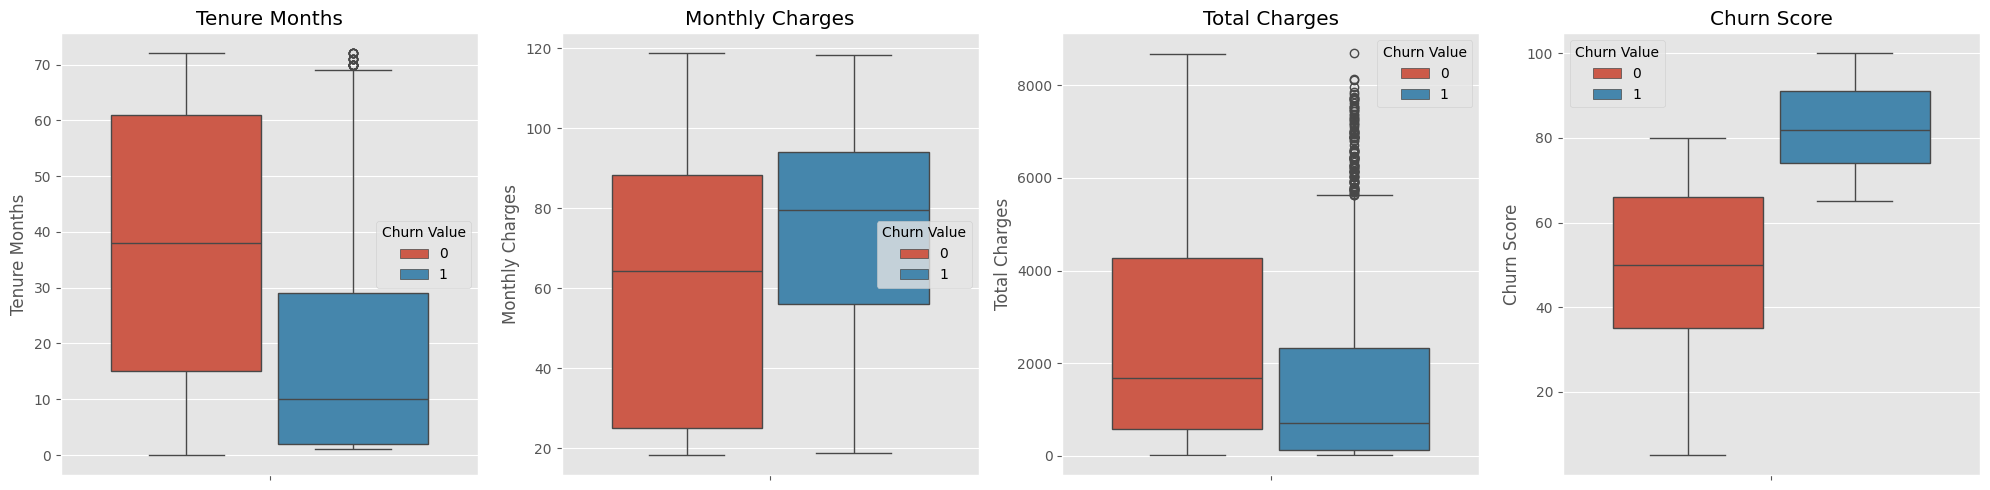

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.boxplot(data=df, y= 'Tenure Months',hue='Churn Value', gap=.1,  ax=ax[0])
ax[0].set_title('Tenure Months')

sns.boxplot(data=df, y= 'Monthly Charges', hue='Churn Value', gap=.1, ax=ax[1])
ax[1].set_title('Monthly Charges')

sns.boxplot(data=df, y= 'Total Charges', hue='Churn Value', gap=.1, ax=ax[2])
ax[2].set_title('Total Charges');

sns.boxplot(data=df, y= 'Churn Score', hue='Churn Value', gap=.1, ax=ax[3])
ax[3].set_title('Churn Score');

plt.tight_layout();

# Modelo
Nesta etapa iremos preparar os dados e desenvolver o nosso modelo de Machine Learning. Temos como objetivo a explorar a otimização dos hiperparâmetros, e para isso escolhemos o modelo XGBClassifier para otimização.

Inicialmente escolhemos o **Recall** como métrica de avaliação do nosso modelo, pois devido a natureza do **Recall**, nosso modelo daria um peso maior para os Falsos Negativos - Clientes que deram Churn mas o modelo classificou como Não Churn.

Porém, acabamos utilizando outra métrica, F1-Score e Precision, que será explicado durante o desenvolvimento do modelo.

Também será utilizada validação cruzada.

Não utilizamos técnicas de balanceamento de dados, pois os temos 27% dos dados na classe alvo, `Churn Value = 1`.


## Preparando os Dados


Vamos começar separando as colunas da nossa base de dados em:
* *Binárias* :
  * Iremos utilizar o `OneHotEncoder` para codificar as variáveis em 0 e 1;
* *Numéricas* :
  * Iremos padronizar `StandarScaler` para padronizar as variaveis;
* *Categóricas* :
  * Iremos utilizar o `get_dummies` para codificar as variáveis.

Primeiro separamos as colunas pelo tipo de variável, em binárias, numéricas e categóricas.

In [ ]:
df_churn = df.copy()
df_dropped = df_churn.drop('Churn Value', axis=1)

In [ ]:
binary_cols = df_dropped.nunique()[df_dropped.nunique() == 2].index.tolist()
num_cols = [col for col in df.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_cols]
cat_cols = [col for col in df.columns.tolist() if col not in binary_cols + num_cols]

Iremos fazer a dumificação das variáveis categóricas.

In [ ]:
df_dum = pd.get_dummies(df_churn[cat_cols], drop_first=True, dtype=float)
df_churn = pd.concat([df_churn, df_dum], axis=1)
df_churn.drop(cat_cols, axis=1, inplace=True)

Vamos separar o dataframe em:
* X -> somente variáveis independentes
* y -> Variável alvo (*Churn Value*)

In [ ]:
X = df_churn.drop('Churn Value', axis=1)
y = df_churn['Churn Value']

Agora podemos aplicar o Encoder nas variáveis binárias.

Utilizaremos o **OneHotEncoder**.

In [ ]:
one_hot = OneHotEncoder(drop='first')
one_hot = one_hot.fit(X[binary_cols])
feature_names = one_hot.get_feature_names_out().tolist()
X_encoded = one_hot.transform(X[binary_cols]).toarray()

X_encoded = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X.drop(binary_cols, axis=1), X_encoded], axis=1)

## Criando o Modelo
Nesta etapa iremos criar o nosso modelo de previsão de Churn.

Serão criadas duas funções para nos ajudar a avaliar o desempenho dos modelos. Uma função para criar modelo, fazer a validação cruzada e apresentar a média dos resultados obtidos e uma função custo.


Começamos separando a base de dados em base de treino e base de teste.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

Criamos a função `val_model` que consiste em criar um pipeline e validação cruzada para os modelos que iremos testar, retornando a média do resultado da validação cruzada.

Inicialmente iriamos utilizar somente o Recall como métrica para avaliar os modelos, porém após alguns testes, resolvemos adicionar outras duas métricas para avaliarmos, F1-Score e Precision.

* Recall -> $\frac{True Positive}{( True Positive + False Negative)}$
  * Avalia a capacidade do modelo em classificar corretamente os "Positivos"


* Precision -> $\frac{True Positive}{( True Positive + False Positive)}$
  * Avalia a taxa de acerto das previsões "Positivas"


* F1-Score -> $ 2*\frac{(Recall * Precision)}{(Recall + Precision)} $

In [ ]:
def val_model(X,y, clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  f1_score = cross_val_score(pipeline, X, y, scoring='f1')
  precision_score = cross_val_score(pipeline,X,y, scoring='precision')
  recall_score = cross_val_score(pipeline,X,y, scoring='recall')

  if quite == False:
    print('F1-Score: {:.2f} (+/- {:.2f})'.format(f1_score.mean(), f1_score.std()))
    print('Precision: {:.2f} (+/- {:.2f})'.format(precision_score.mean(), precision_score.std()))
    print('Recall: {:.2f} (+/- {:.2f})'.format(recall_score.mean(), recall_score.std()))

  return f1_score.mean(), precision_score.mean(), recall_score.mean()

Em seguida criamos uma função custo para avaliar os erros do modelo, penalizando numa escala 50:1 os valores falsos negativos x falso positivo.

Colocamos essa escala pois perder um cliente gera mais impacto para a empresa que, por exemplo, oferecer um benefício para um cliente para fideliza-lo.
Porém temos que tomar cuidado pois o modelo pode classificar todos os clientes como possível Churn, logo isso poderia impactar as receitas da empresa.

In [ ]:
def cost_function(y_test, y_pred):
  sum = 0
  for _y, _y_pred in zip(y_test, y_pred):
    if _y != _y_pred:
      n = 50 if _y == 1 else 1
      sum += n
  return sum

Vamos criar um modelo baseline para termos como parâmetro base para avaliação dos demais modelos. Não iremos alterar nenhum hiperparâmetro. A ideia é verificar se através da otimização de hiperparâmetros nós conseguimos obter um resultado superior a esse.

In [ ]:
rf = RandomForestClassifier()
y_pred = rf.fit(x_train,y_train).predict(x_test)
baseline_score = val_model(X,y, rf)
print('Cost_Score: {}'.format(cost_function(y_test, y_pred)))

F1-Score: 0.86 (+/- 0.01)
Precision: 0.88 (+/- 0.01)
Recall: 0.84 (+/- 0.01)
Cost_Score: 3607


Iremos aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM



In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbosity=0)

model = []
f1_score = []
precision = []
recall = []
cost = []

for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
  model.append(clf.__class__.__name__)
  val = val_model(x_train, y_train, clf, quite=True)
  f1_score.append(val[0])
  precision.append(val[1])
  recall.append(val[2])
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  cost.append(cost_function(y_test, y_pred))

pd.DataFrame({'model': model, 'F1-Score': f1_score, 'precision': precision,
              'recall':recall,'cost': cost}).sort_values(by='F1-Score', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


,model,F1-Score,precision,recall,cost
0,RandomForestClassifier,0.862087,0.876772,0.845856,3611
6,LGBMClassifier,0.861503,0.868055,0.855266,3276
5,XGBClassifier,0.861162,0.867210,0.855271,3321
4,LogisticRegression,0.852641,0.851966,0.853819,4392
2,SGDClassifier,0.837370,0.834873,0.795854,17923
3,SVC,0.834250,0.844946,0.824143,24350
1,DecisionTreeClassifier,0.819823,0.807068,0.825619,4087


## Otimização de Hiperparâmetros - XBGClassifier

Optamos esse modelo por possuir um conjunto de hiperparâmetros mais robustos para otimização.

Nosso Objetivo através da otimização é conseguir um resultado superior ao apresentado anteriormente pelo nosso modelo *Baseline* de RandomForest

Começamos com a padronização do nosso dataset, e em seguida otimizaremos o hiperparâmetro `n_estimators`

In [ ]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1)

param_grid = {
    'n_estimators':range(0,1000,50)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, cv=kfold, scoring='recall', n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Melhor: {} para {}'.format(grid_search.best_score_, grid_search.best_params_))

Melhor: 0.876207946493396 para {'n_estimators': 50}


Com o número de estimadores igual a 50, realizaremos a busca pelos parâmtros `max_depth` e `min_child_weight`.

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators=50)

param_grid = {
    'max_depth':range(1,15,1),
    'min_child_weight':range(1,10,1)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, cv=kfold, scoring='recall', n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

print('Melhor: {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8943123761860079 para {'max_depth': 5, 'min_child_weight': 7}


Obtidos os valores de `max_depth=5` e `min_child_weight=7`, iremos otimizar o parâmetro `gamma`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=5, min_child_weight=7)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8914659576686477 para {'gamma': 0.2}


Obtido o valor de `gamma=0.2`, iremos otimizar o parâmetro `learning_rate`

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=6, min_child_weight=6, gamma = 0.2)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.876876462003146 para {'learning_rate': 0.1}


Após otimizar alguns hiperparâmetros, vamos verificar o resultado obtido por nosso modelo e comparar com nosso Baseline.

Ao analisar o relatório, podemos ver que o nosso modelo apresenta um Recall de 100%, o que não é algo bom. Através da matriz de confusão, podemos ver o problema do modelo. Todas as previsões que o modelo fez foi considerando o cliente como **Churn**. Para uma classificação como esta não há necessidade de criação de um modelo, basta considerar que todos são **Churn** e em algum momento irá acertar.

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1274
           1       0.28      1.00      0.43       487

    accuracy                           0.28      1761
   macro avg       0.64      0.50      0.22      1761
weighted avg       0.80      0.28      0.12      1761

AUC: 0.5000



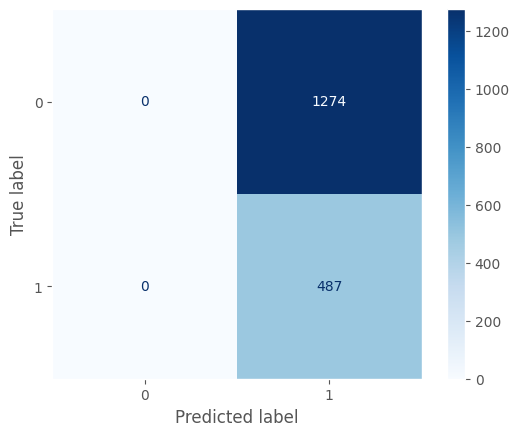

In [ ]:
# modelo final
xgb = XGBClassifier(learning_rate=0.1 , n_estimators=50, max_depth=6, min_child_weight=6, gamma=0.02)
xgb.fit(x_train, y_train)

# fazer a previsão
X_test = scaler.transform(x_test)
y_pred = xgb.predict(x_test)

# Classification Report
print(classification_report(y_test, y_pred, zero_division=1.0))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb.classes_)
disp.plot(cmap='Blues')
plt.grid(False)
plt.show();

## Otimização de Hiperparâmetros - RandomForestClassifier

Com base nos resultados obtidos no modelo anterior, resolvemos criar um novo modelo, com base no nosso modelo Baseline, haja visto que além do modelo anterior não ser um bom modelo, ele também não obteve resultados superiores ao do Baseline.


Fizemos 3 versões desse modelo, utilizando como `scoring`:
* Recall
* F1-Score
* Precision

Optamos por seguir no modelo utilizando **Precision** pois foi o único que nos apresentou um bom equilibrio entre as previsões e os dados reais, com um resultado menos parecido com um Overfit.

O hiperparâmetro `n_estimators` padrão do RandomForest é 100, deixaremos explicito para entendermos com quais parâmetros estamos trabalhando durante a otimização.

Vamos começar otimizando `max_depth` e `min_samples_leaf`

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

params_grid = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, params_grid, cv=kfold, scoring='precision', n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Melhor: {} para {}'.format(grid_search.best_score_, grid_search.best_params_))

Melhor: 0.9351287592763218 para {'max_depth': 20, 'min_samples_leaf': 200}


Obtido os valores de `max_depth=20` e `min_samples_leaf=200`, iremos otimizar o `criterion`

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=200)

params_grid = {
    'criterion': ['gini', 'entropy', 'log_loss']
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, params_grid, cv=kfold, scoring='precision', n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Melhor: {} para {}'.format(grid_search.best_score_, grid_search.best_params_))

Melhor: 0.9349252875051413 para {'criterion': 'gini'}


Obtido o valor de `criterion = gini`, iremos otimizar `n_estimator`

In [ ]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=200, criterion='gini')

params_grid = {
    'n_estimators': range(10,1000,50)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, params_grid, cv=kfold, scoring='precision', n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Melhor: {} para {}'.format(grid_search.best_score_, grid_search.best_params_))

Melhor: 0.9364426230989166 para {'n_estimators': 310}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1274
           1       0.45      0.89      0.60       487

    accuracy                           0.67      1761
   macro avg       0.69      0.74      0.66      1761
weighted avg       0.80      0.67      0.69      1761

0.9739495798319329


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


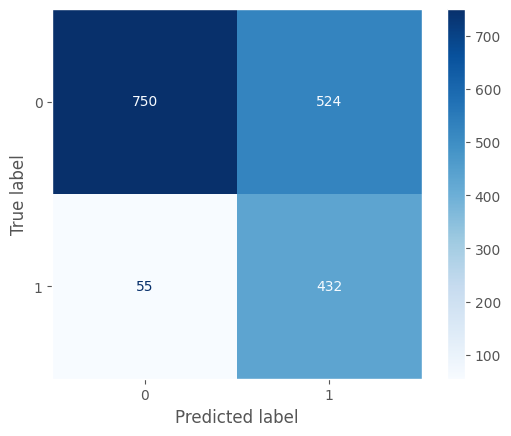

In [ ]:
rf = RandomForestClassifier(n_estimators=310, max_depth=20, min_samples_leaf=200, criterion='gini')

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred, zero_division=1.0))

print(cross_val_score(rf, x_test, y_test, scoring='precision').mean())

ConfusionMatrixDisplay.from_estimator(rf,x_test,y_test, cmap='Blues')
plt.grid(False)
plt.show();

# Conclusão

Mesmo com a otimização dos hiperparâmetros, o modelo XGBClassifier não conseguiu perfomar melhor que o modelo Baseline, além de apresentar um Overfit, classificando todos os dados da base teste como Churn. Testamos outras abordagens para o métrica de avaliação da validação cruzada, como F1-Score e Precision, porém mesmo assim o XGBClassifier continuo apresentando um Recall em 100%, Sobreajustando o modelo.

Quando utilizamos a mesma abordagem no RandomForestClassifier, também tivemos um Overfit do modelo, classificando todos como Churn. Então, resolvemos mudar a abordagem e utilizamos Precision. Mesmo Precision não sendo a melhor métrica para esse tipo de modelo, pois estamos preocupados com os *True Positives* e *False Negatives* - Recall, Precision foi a métrica a qual não apresentou o Overfit - sobreajuste.

Existem outras modelos e ajustes que poderemos fazer - e serão feitos futuramente - para tentarmos melhorar o Recall do nosso modelo, aumentando os *True Negatives* e reduzindo os *False Positives*.

Sabemos que um False Positive não possui um impacto tão grande na receita, porém não podemos classifica-los erroneamente, pois uma vez que identificamos um possivel Churn, diversas medidas serão tomadas com esse cliente para evitar o Churn, gerando custos e até mesmo promoções para um cliente que não seria Churn, reduzindo a receita.